In [86]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler

In [7]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Let's define some constant to help us later on

In [21]:
train_path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [55]:
train.shape

(120, 5)

In [56]:
train

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [54]:
test.shape

(30, 5)

In [27]:
train_x = train[train.columns[:-1]].values
train_y = train[train.columns[-1]].values
test_x = test[test.columns[:-1]].values
test_y = test[test.columns[-1]].values

In [30]:
train.shape, train_y.shape, train_x.shape

((120, 5), (120,), (120, 4))

In [52]:
len(train[train['Species']==0])

42

# Plot Features Against Corresponding Labels
### Look for obvious signs of correlation between feature values and label outcome

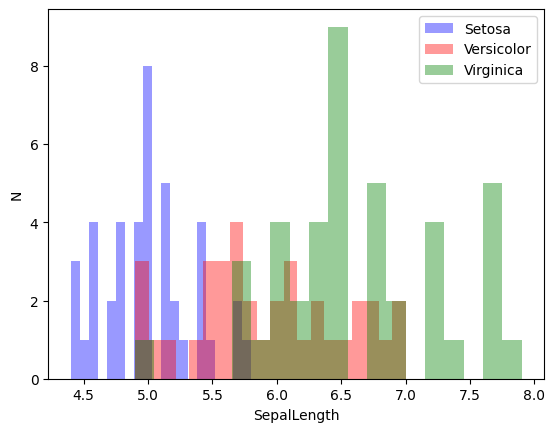

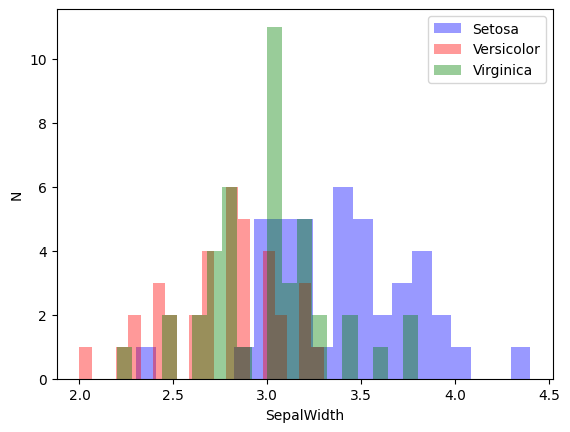

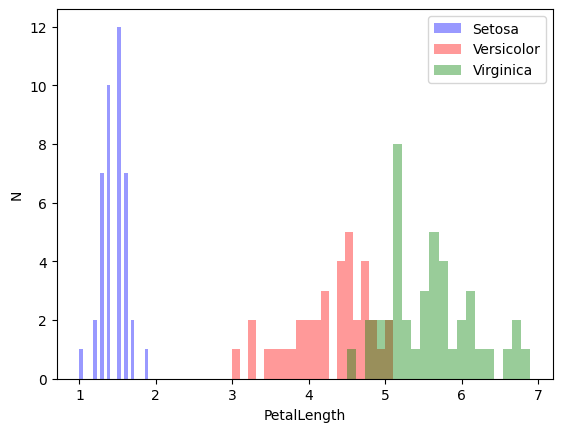

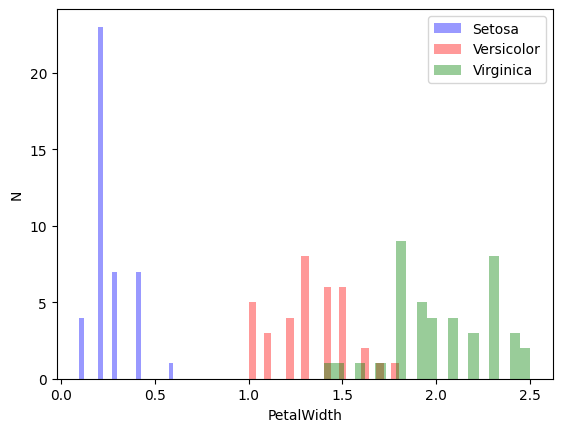

In [66]:
for i in range (len(train.columns[:-1])):
    feature = train.columns[i]
    plt.hist(train[train['Species'] == 0][feature], color='blue', label='Setosa', alpha=0.4, bins=20)
    plt.hist(train[train['Species'] == 1][feature], color='red', label='Versicolor', alpha=0.4, bins=20)
    plt.hist(train[train['Species'] == 2][feature], color='green', label='Virginica', alpha=0.4, bins=20)
    plt.xlabel(feature)
    plt.ylabel('N')
    plt.legend()
    plt.show()

# Determine Shape/Sampling Skew of Specific Label Outcomes

In [72]:
len(test[test['Species']==0]), len(test[test['Species']==1]), len(test[test['Species']==2])

(8, 14, 8)

In [73]:
len(train[train['Species']==0]), len(train[train['Species']==1]), len(train[train['Species']==2])

(42, 36, 42)

In [77]:
train_x.shape, train_y.shape

((120, 4), (120,))

# Use RandomOverSampler to Normalize Label Outcomes

### This helps to prevent our model from becoming skewed by seeing more of a particular outcome

In [92]:
over = RandomOverSampler()

train_x, train_y = over.fit_resample(train_x, train_y)
test_x, test_y = over.fit_resample(test_x, test_y)

In [94]:
(train_x.shape, train_y.shape), (test_x.shape, test_y.shape)

(((126, 4), (126,)), ((42, 4), (42,)))

# Use StandardScaler to Normalize Range of Feature Values, then Recombine the Normalized DataFrame

In [95]:
scalar = StandardScaler()

train_x = scalar.fit_transform(train_x)
test_x = scalar.fit_transform(test_x)

train_data = np.hstack((train_x, np.reshape(train_y, (-1,1))))
test_data = np.hstack((test_x, np.reshape(test_y, (-1,1))))

transformed_train_df = pd.DataFrame(data, columns=train.columns)
transformed_test_df = pd.DataFrame(data, columns=train.columns)

In [100]:
len(transformed_train_df[transformed_train_df['Species']==0]), len(transformed_train_df[transformed_train_df['Species']==1]), len(transformed_train_df[transformed_train_df['Species']==2])

(42, 42, 42)

In [102]:
len(transformed_test_df[transformed_test_df['Species']==0]), len(transformed_test_df[transformed_test_df['Species']==1]), len(transformed_test_df[transformed_test_df['Species']==2])

(42, 42, 42)

# Build a Neural Net Model

In [132]:
model = tf.keras.Sequential([
                           tf.keras.layers.Dense(16, activation='relu'), 
                           tf.keras.layers.Dense(16, activation='relu'), 
                           tf.keras.layers.Dense(3, activation='softmax')    # An output layer of 3 nodes allows for outcome labels of 0, 1, or 2. 
                           ])

In [135]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),     # If predicting binary label outcomes (your only labels are 0, 1 or 1, 2) then use keras.losses.BinaryCrossentropy()
             metrics='accuracy')

# Train the Model

In [134]:
model.fit(train_x, train_y, batch_size=5, epochs=25, validation_data=(test_x, test_y))

Epoch 1/25
26/26 [==============================] - 1s 6ms/step - loss: 1.1504 - accuracy: 0.2063 - val_loss: 1.0224 - val_accuracy: 0.5476
Epoch 2/25
26/26 [==============================] - 0s 2ms/step - loss: 1.0227 - accuracy: 0.5556 - val_loss: 0.8939 - val_accuracy: 0.7143
Epoch 3/25
26/26 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.7381 - val_loss: 0.7789 - val_accuracy: 0.8095
Epoch 4/25
26/26 [==============================] - 0s 2ms/step - loss: 0.7636 - accuracy: 0.8571 - val_loss: 0.6601 - val_accuracy: 0.8810
Epoch 5/25
26/26 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.8413 - val_loss: 0.5602 - val_accuracy: 0.8333
Epoch 6/25
26/26 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8413 - val_loss: 0.4877 - val_accuracy: 0.8333
Epoch 7/25
26/26 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8333 - val_loss: 0.4364 - val_accuracy: 0.8333
Epoch 8/25
26/26 [==